## Importing libraries

In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [4]:
chicago_cmr = pd.read_csv('../Data/Crimes_-_2001_to_present.csv')

In [5]:
chicago_cmr.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,6306502,HP396389,06/15/2008 09:30:00 AM,034XX N GREENVIEW AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,44.0,6.0,26,1165702.0,1922871.0,2008,02/28/2018 03:56:25 PM,41.943949,-87.666357,"(41.943949496, -87.666357449)"
1,6306503,HP396744,06/14/2008 02:00:00 PM,002XX W 87TH ST,0920,MOTOR VEHICLE THEFT,ATT: AUTOMOBILE,PARKING LOT/GARAGE(NON.RESID.),False,False,...,21.0,44.0,07,1176467.0,1847230.0,2008,02/28/2018 03:56:25 PM,41.736148,-87.629070,"(41.736148121, -87.629070243)"
2,6306504,HP396660,06/15/2008 01:10:00 PM,025XX N NARRAGANSETT AVE,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,...,36.0,19.0,06,1133315.0,1916277.0,2008,02/28/2018 03:56:25 PM,41.926485,-87.785554,"(41.926484632, -87.785553657)"
3,6306505,HP396298,06/14/2008 11:00:00 PM,037XX W 63RD PL,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,13.0,65.0,06,1152450.0,1862235.0,2008,02/28/2018 03:56:25 PM,41.777830,-87.716667,"(41.777829947, -87.716666719)"
4,6306507,HP396502,06/15/2008 12:00:00 AM,031XX N MENARD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,30.0,19.0,14,1137162.0,1920294.0,2008,02/28/2018 03:56:25 PM,41.937439,-87.771321,"(41.937439407, -87.771320705)"


## Dropping columns that won't be of use

In [7]:
chicago_clean = chicago_cmr.drop(['ID', 'Case Number', 'Block', 'Ward', 'Community Area', 'FBI Code',
                                 'X Coordinate', 'Y Coordinate', 'Updated On'], axis=1)

## Changing type of Date column from object to datetime64[ns]


In [8]:
chicago_clean['Date'] = pd.to_datetime(chicago_clean['Date'])

In [9]:
chicago_clean.dtypes

Date                    datetime64[ns]
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                       float64
Year                             int64
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

## Checking for null values


In [10]:
chicago_clean.isna().sum()

Date                        0
IUCR                        0
Primary Type                0
Description                 0
Location Description     4794
Arrest                      0
Domestic                    0
Beat                        0
District                   47
Year                        0
Latitude                63749
Longitude               63749
Location                63749
dtype: int64

## Creating a heatmap to visualize all the missing values in perspective to the whole dataset


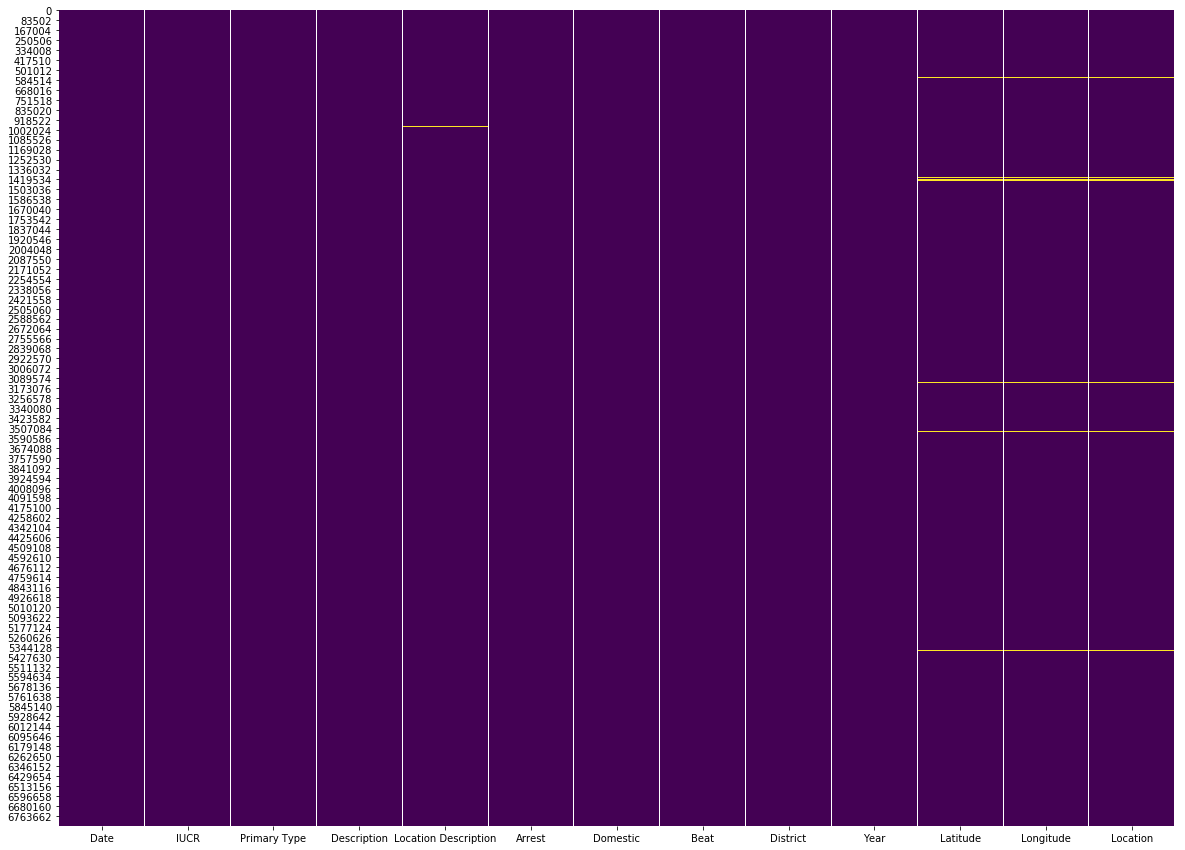

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(chicago_clean.isnull(), cbar = False, cmap = 'viridis')